In [2]:
import pandas as pd
import seaborn
%matplotlib inline

iris = pd.read_csv("E:/data/iris.data.csv")
iris.sample(10)

,id,sepal_length,sepal_width,petal_length,petal_width,species
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
112,113,6.8,3.0,5.5,2.1,Iris-virginica
8,9,4.4,2.9,1.4,0.2,Iris-setosa
28,29,5.2,3.4,1.4,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [8]:
iris.loc[4:10,['id','petal_length']]

,id,petal_length
4,5,1.4
5,6,1.7
6,7,1.4
7,8,1.5
8,9,1.4
9,10,1.5
10,11,1.5


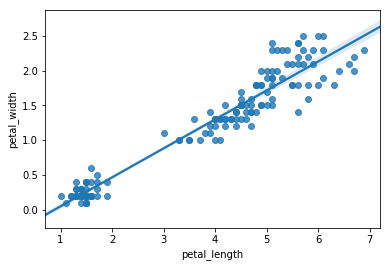

In [3]:
#seaborn.distplot(iris['sepal_length'])
seaborn.regplot(x = iris['petal_length'],y = iris['petal_width'])

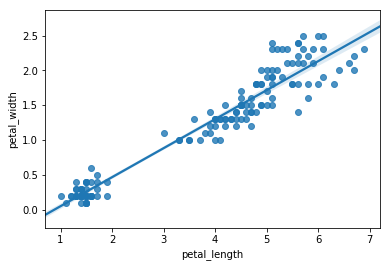

In [4]:
seaborn.regplot(x = 'petal_length',y ='petal_width',data = iris)

In [4]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score 
import numpy as np

lm = linear_model.LinearRegression() #构造了代表线性回归的一个类

features = ['petal_length']
X = iris[features] #也可以这样写：X=iris[['petal_length']] #注意是两个括号
y = iris['petal_width']
print(X.shape,y.shape)
#print(X)
model = lm.fit(X,y)
print(model.intercept_,model.coef_)#y =ax+b,前者是b值截距，后者是特征值系数a
scores = -cross_val_score(lm,X,y,cv = 5,scoring = 'neg_mean_absolute_error')#默认输出是负数，添加负号后，值越小越好
print(np.mean(scores))
print(model.predict(1.4))

(150, 1) (150,)
-0.366514045217 [ 0.41641913]
0.165105751004
[ 0.21647274]


In [18]:
model.predict(4.4)

array([ 1.46573014])

In [13]:
features = ['petal_length','sepal_length']
X = iris[features] #X=iris['petal_length']
y = iris['petal_width']
print(X.shape,y.shape)
model = lm.fit(X,y)
print(model.intercept_,model.coef_)#y =ax+b,前者是b值截距，后者是特征值系数a
#y = -0.0139 + 0.4499 * x1 + (-0.08 * x2)
scores = -cross_val_score(lm,X,y,cv = 5,scoring = 'neg_mean_absolute_error')#默认输出是负数，添加负号后，值越小越好
print(np.mean(scores))
data={'petal_length':[3.7],'sepal_length':[5.5]}
p=pd.DataFrame(data)
model.predict(p)

(150, 2) (150,)
-0.013852011013 [ 0.44992999 -0.08190841]
0.167081306297


array([ 1.20039266])

In [23]:
features = ['petal_length','sepal_length','sepal_width']
X = iris[features] #X=iris['petal_length']
y = iris['petal_width']
print(X.shape,y.shape)
model = lm.fit(X,y)
print(model.intercept_,model.coef_)#y =ax+b,前者是b值截距，后者是特征值系数a
#y = -0.0139 + 0.4499 * x1 + (-0.08 * x2)
scores = -cross_val_score(lm,X,y,cv = 5,scoring = 'neg_mean_absolute_error')#默认输出是负数，添加负号后，值越小越好
print(np.mean(scores))

(150, 3) (150,)
-0.248723586024 [ 0.52608818 -0.21027133  0.22877721]
0.152293217811
